In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-part2/titanic.csv


In [2]:
ds= pd.read_csv('//kaggle/input/titanic-part2/titanic.csv',index_col='PassengerId')
ds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
#changing the categorical columns to numerical columns in the dataset using target encoding
categorical_columns = ds.select_dtypes(object).columns
categorical_columns_list = categorical_columns.tolist()


for column in categorical_columns:
    mean_target = ds.groupby(column)['Survived'].transform('mean')
    ds[column] = mean_target
ds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,0.0,0.188908,22.0,1,0,0.0,7.2500,NaN,0.336957
2,1,1,1.0,0.742038,38.0,1,0,1.0,71.2833,1.0,0.553571
3,1,3,1.0,0.742038,26.0,0,0,1.0,7.9250,NaN,0.336957
4,1,1,1.0,0.742038,35.0,1,0,0.5,53.1000,0.5,0.336957
5,0,3,0.0,0.188908,35.0,0,0,0.0,8.0500,NaN,0.336957
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0.0,0.188908,27.0,0,0,0.0,13.0000,NaN,0.336957
888,1,1,1.0,0.742038,19.0,0,0,1.0,30.0000,1.0,0.336957
889,0,3,0.0,0.742038,NaN,1,2,0.0,23.4500,NaN,0.336957


In [4]:
#dropping cabin since most of the entires are missing
ds = ds.drop("Cabin", axis='columns')

In [5]:
#inputting median values of the column in the empty spaces
median_value = ds.median()
ds= ds.fillna(median_value)
ds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,0.0,0.188908,22.0,1,0,0.0,7.2500,0.336957
2,1,1,1.0,0.742038,38.0,1,0,1.0,71.2833,0.553571
3,1,3,1.0,0.742038,26.0,0,0,1.0,7.9250,0.336957
4,1,1,1.0,0.742038,35.0,1,0,0.5,53.1000,0.336957
5,0,3,0.0,0.188908,35.0,0,0,0.0,8.0500,0.336957
...,...,...,...,...,...,...,...,...,...,...
887,0,2,0.0,0.188908,27.0,0,0,0.0,13.0000,0.336957
888,1,1,1.0,0.742038,19.0,0,0,1.0,30.0000,0.336957
889,0,3,0.0,0.742038,28.0,1,2,0.0,23.4500,0.336957


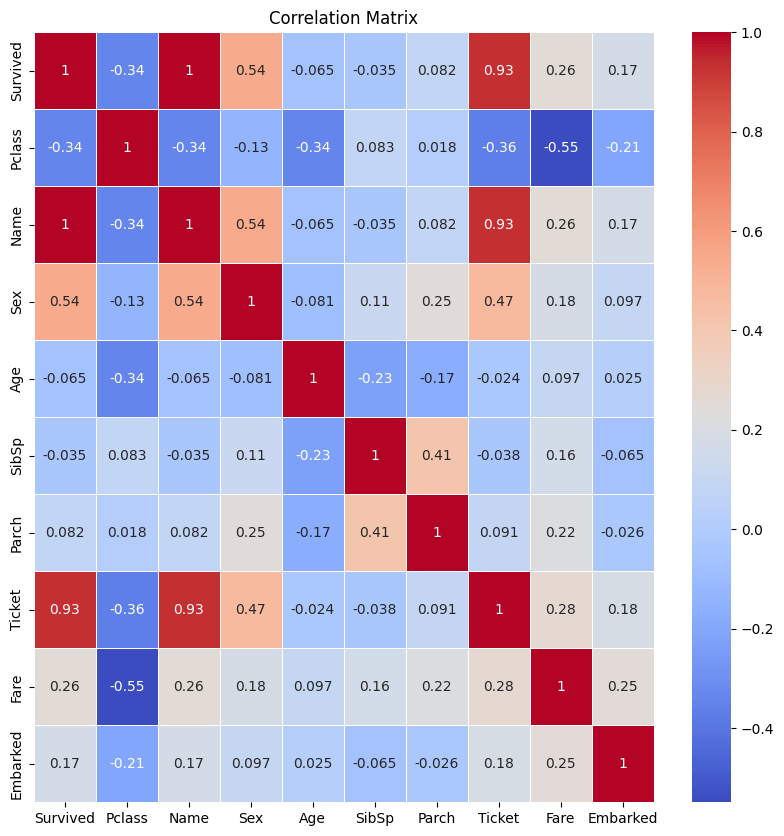

In [6]:
#making a correlation matrix
c_mat=ds.corr()
plt.figure(figsize=(10,10))
sns.heatmap(c_mat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [7]:
#dropping name and ticket due to both of them having too high of a correlation
ds = ds.drop(['Name', 'Ticket'], axis=1)

In [8]:
#normalizing the dataset
dsb=ds
numerical_columns = ds.select_dtypes(include=['float64', 'int64']).columns

def z_score_standardization(data):
    mean = np.mean(data)
    std_dev = np.std(data)

    standardized_data = (data - mean) / std_dev

    return standardized_data

ds[numerical_columns] = ds[numerical_columns].apply(z_score_standardization)
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,-0.789272,0.827377,-0.737695,-0.565736,0.432793,-0.473674,-0.502445,-0.541542
2,1.266990,-1.566107,1.355574,0.663861,0.432793,-0.473674,0.786845,2.042658
3,1.266990,0.827377,1.355574,-0.258337,-0.474545,-0.473674,-0.488854,-0.541542
4,1.266990,-1.566107,1.355574,0.433312,0.432793,-0.473674,0.420730,-0.541542
5,-0.789272,0.827377,-0.737695,0.433312,-0.474545,-0.473674,-0.486337,-0.541542
...,...,...,...,...,...,...,...,...
887,-0.789272,-0.369365,-0.737695,-0.181487,-0.474545,-0.473674,-0.386671,-0.541542
888,1.266990,-1.566107,1.355574,-0.796286,-0.474545,-0.473674,-0.044381,-0.541542
889,-0.789272,0.827377,1.355574,-0.104637,0.432793,2.008933,-0.176263,-0.541542


In [9]:
#Test Train Split
X=ds.drop("Survived", axis=1)
y=ds.Survived
X=X.to_numpy()
y=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [10]:
#SVM model
class SVM:

    def initialize(self):
        self.w = None
        self.b = None

    def fit(self, X, y, learning_rate, iterations, lambda_param=0.01):
        self.learning_rate=learning_rate
        self.iterations=iterations
        self.lambda_param=lambda_param
        n_samples, n_features = X.shape

        y_= np.where(y <= 0, -1, 1)

        # init weights
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.iterations):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate* (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


In [11]:
#passing the dataset through the model
svm_model = SVM()
learning_rate=0.001
iterations=1000
svm_model.fit(X_train, y_train, learning_rate, iterations)
y_pred = svm_model.predict(X_test)

In [12]:
y_pred = np.where(y_pred <= 0, -1, 1)
y_test = np.where(y_test <= 0, -1, 1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print("Accuracy:",(accuracy*100),'%')
print("Precision:",(precision*100),'%')
print("Recall:",(recall*100),'%')
print("F1 Score:",(f1*100),'%')
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 83.24022346368714 %
Precision: 81.35593220338984 %
Recall: 71.64179104477611 %
F1 Score: 76.1904761904762 %
Confusion Matrix:
[[101  11]
 [ 19  48]]
